
Based on https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weights (num_inputs + 1 for bias)
        self.weights = np.random.rand(num_inputs + 1)  # Random initialization
        self.learning_rate = learning_rate  # Learning rate

    def linear(self, inputs):
      Z = inputs @ self.weights[1:].T + self.weights[0]  # Weighted sum: XW + b
      return Z

    def activation(self, Z):
      return np.where(Z >= 0, 1, 0) # Heaviside Step function

    def predict(self, inputs):
        Z = self.linear(inputs)  # Pass inputs through the linear layer
        try:
            pred = []
            for z in Z:  # For batch inputs
                pred.append(self.activation(z))
        except:
            return self.activation(Z)  # For single input
        return pred  # Return prediction

    def loss(self, prediction, target):
        loss = (prediction - target)  # Error or loss calculation
        return loss

    def train(self, inputs, target):
        prediction = self.predict(inputs)  # Get prediction
        error = self.loss(prediction, target)  # Calculate error (loss)
        self.weights[1:] += self.learning_rate * error * inputs  # Update weights
        self.weights[0] += self.learning_rate * error  # Update bias

    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):  # Loop through dataset
                self.train(inputs, target)  # Train on each input-target pair


Accuracy: 0.975


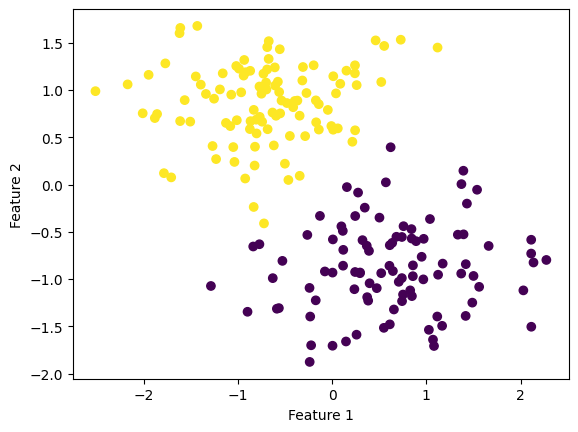

In [3]:
# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()